# Useful web pages
markers: https://matplotlib.org/stable/api/markers_api.html

colors: https://matplotlib.org/stable/gallery/color/named_colors.html

statannot documentation: https://github.com/webermarcolivier/statannot/blob/master/example/example.ipynb

In [ ]:
pip install statannot

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

# Data import + some extras

In [ ]:
# import data (insert path to the file)
path = 'practice_data - VitC_for_csv.csv'
vitc_df = pd.read_csv(path)

In [ ]:
vitc_df

,mouse,type,time,cortisol concentration
0,VitC_def_1,def,before,5
1,VitC_def_2,def,before,6
2,VitC_def_3,def,before,5
3,Control_1,ctrl,before,5
4,Control_2,ctrl,before,5
5,Control_3,ctrl,before,6
6,VitC_def_1,def,0h,25
7,VitC_def_2,def,0h,21
8,VitC_def_3,def,0h,22
9,Control_1,ctrl,0h,20


In [ ]:
# Pivot data for better visualization
wide_df = vitc_df.pivot_table(values='cortisol concentration', columns='time', index=['mouse', 'type'])
# Rearrange columns
wide_df = wide_df[['before', '0h', '6h','12h', '24h']]

wide_df

,time,before,0h,6h,12h,24h
mouse,type,,,,,
Control_1,ctrl,5,20,10,8,5
Control_2,ctrl,5,26,16,10,6
Control_3,ctrl,6,23,12,11,5
VitC_def_1,def,5,25,21,17,15
VitC_def_2,def,6,21,20,18,16
VitC_def_3,def,5,22,19,17,16


In [ ]:
# And use it to show mean values
wide_df.reset_index().groupby('type').mean().round(1)

time,before,0h,6h,12h,24h
type,,,,,
ctrl,5.3,23.0,12.7,9.7,5.3
def,5.3,22.7,20.0,17.3,15.7


In [ ]:
# Or show mean values for the group rightaway (from long-form data)
wide_mean = vitc_df.pivot_table(values='cortisol concentration', columns='time', index='type', aggfunc='mean')
wide_mean = wide_mean[['before', '0h', '6h','12h', '24h']]
wide_mean.round(1)

time,before,0h,6h,12h,24h
type,,,,,
ctrl,5.3,23.0,12.7,9.7,5.3
def,5.3,22.7,20.0,17.3,15.7


# Simple graphs

In [ ]:
x = 'time'
y = 'cortisol concentration'
data_simple = vitc_df.loc[vitc_df['type']=='ctrl']

In [ ]:
data_simple

,mouse,type,time,cortisol concentration
3,Control_1,ctrl,before,5
4,Control_2,ctrl,before,5
5,Control_3,ctrl,before,6
9,Control_1,ctrl,0h,20
10,Control_2,ctrl,0h,26
11,Control_3,ctrl,0h,23
15,Control_1,ctrl,6h,10
16,Control_2,ctrl,6h,16
17,Control_3,ctrl,6h,12
21,Control_1,ctrl,12h,8


## Line

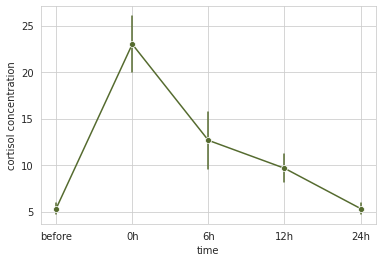

In [ ]:
fig, ax = plt.subplots()

sns.lineplot(x=x, y=y, data=data_simple, err_style='bars', marker='o', color='darkolivegreen', ci='sd')

plt.show()

# markers: https://matplotlib.org/stable/api/markers_api.html
# colors: https://matplotlib.org/stable/gallery/color/named_colors.html

## Bar

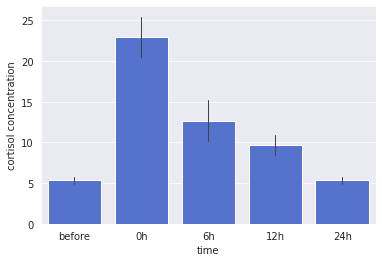

In [ ]:
fig, ax = plt.subplots()

sns.set_style("darkgrid")

sns.barplot(x=x, y=y, data=data_simple,
            color='royalblue',
            ci='sd', errwidth=1)

plt.show()

## Swarmplot

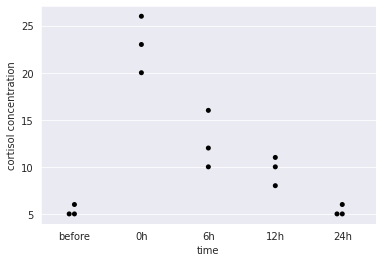

In [ ]:
fig, ax = plt.subplots()

sns.set_style("whitegrid")

sns.swarmplot(x=x, y=y, data=data_simple,
              dodge=True, color='black')

plt.show()

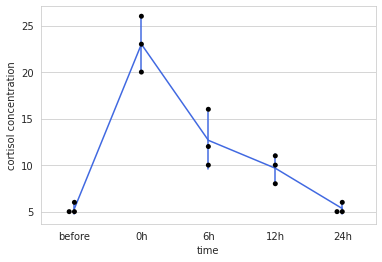

In [ ]:
fig, ax = plt.subplots()

sns.set_style("whitegrid")

sns.lineplot(x=x, y=y, data=data_simple, 
             err_style='bars', color = 'royalblue',
             estimator=np.mean, ci='sd')

sns.swarmplot(x=x, y=y, data=data_simple,
              color='black')

plt.show()

## Statistical significance, p-values

In [ ]:
# Pairs for comparison: [(x1, x2), ...... ]
pairs = [
         ('before', '0h'),
         ('before', '6h'),
         ('before', '12h'),
         ('before', '24h')

]

before v.s. 0h: t-test independent samples, P_val=5.585e-04 stat=-1.002e+01
before v.s. 6h: t-test independent samples, P_val=1.503e-02 stat=-4.085e+00
before v.s. 12h: t-test independent samples, P_val=1.006e-02 stat=-4.596e+00
before v.s. 24h: t-test independent samples, P_val=1.000e+00 stat=0.000e+00


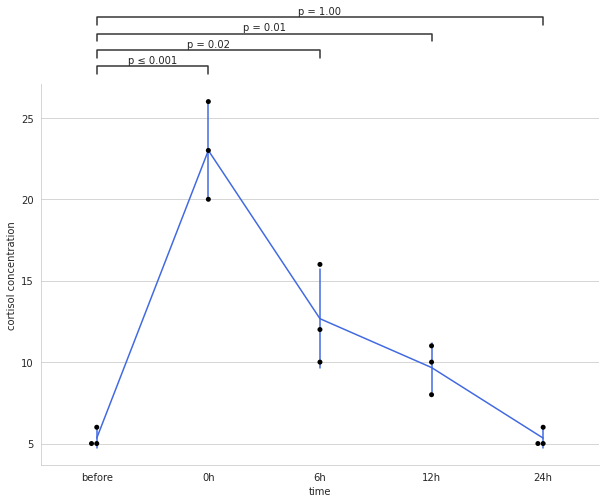

In [ ]:
# Size
fig, ax = plt.subplots(figsize=(10,7))

# Style
sns.set_style("whitegrid")
sns.despine()

sns.lineplot(x=x, y=y, data=data_simple, 
             err_style='bars', color = 'royalblue',
             estimator=np.mean, ci='sd')

sns.swarmplot(x=x, y=y, data=data_simple,
              color='black')

# p-values
ax, t_results = add_stat_annotation(ax, data=data_simple, x=x, y=y,
                    box_pairs=pairs,
                    test='t-test_ind', text_format='simple', loc='outside',
                    comparisons_correction=None, verbose=1,)

plt.show()

# Graphs with hue (different groups)

## Line graph

In [ ]:
x = 'time'
y = 'cortisol concentration'
hue = 'type'
data = vitc_df

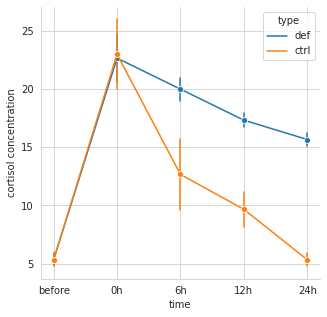

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.set_style("whitegrid")
sns.despine()

sns.lineplot(x=x, y=y, hue=hue, data=data, 
             err_style='bars', marker='o',
             estimator=np.mean, ci='sd')

plt.show()

## Swarm plot

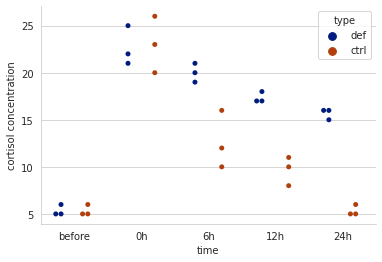

In [ ]:
fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.despine()

sns.swarmplot(x=x, y=y, hue=hue, data=data,
              dodge=True, palette='dark')

plt.show()

## Barplot

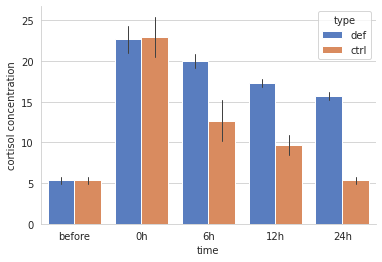

In [ ]:
fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.despine()

sns.barplot(x=x, y=y, hue=hue, data=data,
            dodge=True, palette='muted',
            ci='sd', errwidth=1)

plt.show()

## Box plot

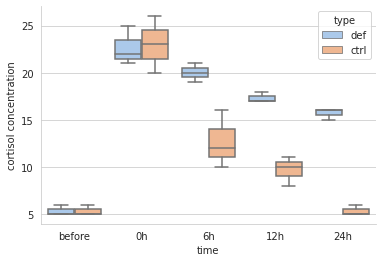

In [ ]:
fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.despine()

sns.boxplot(x=x, y=y, hue=hue, data=data, 
            dodge=True, palette='pastel')

plt.show()

## Combined


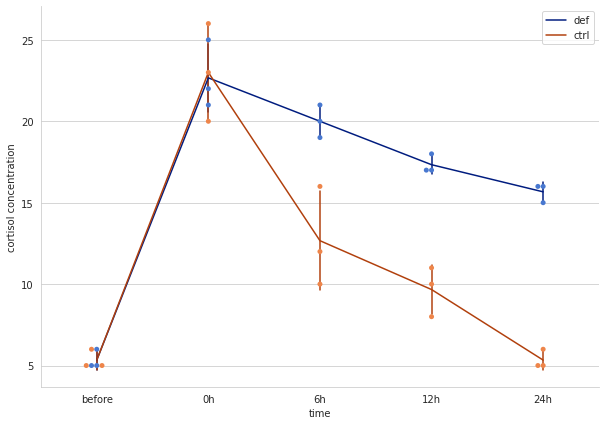

In [ ]:
# Size
fig, ax = plt.subplots(figsize=(10,7))

# Style
sns.set_style("whitegrid")
sns.despine()

# Plots
sns.lineplot(x=x, y=y, hue=hue, data=data, 
             err_style='bars', palette='dark',
             estimator=np.mean, ci='sd')

sns.swarmplot(x=x, y=y, hue=hue, data=data,
              dodge=False, palette='muted')

# Adjust the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2])

# Save and show
plt.savefig('res.png', bbox_inches='tight')
plt.show()

## Statistical significance and p-values

In [ ]:
# Pairs for comparison: [((x1, hue1), (x2, hue2)), ...... ]
pairs = [
         (('before','ctrl'), ('before', 'def')),
         (('0h','ctrl'), ('0h', 'def')),
         (('6h','ctrl'), ('6h', 'def')),
         (('12h','ctrl'), ('12h', 'def')),
         (('24h','ctrl'), ('24h', 'def')),
]


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0h_def v.s. 0h_ctrl: t-test independent samples, P_val=8.820e-01 stat=-1.581e-01
before_def v.s. before_ctrl: t-test independent samples, P_val=1.000e+00 stat=0.000e+00
6h_def v.s. 6h_ctrl: t-test independent samples, P_val=1.680e-02 stat=3.951e+00
12h_def v.s. 12h_ctrl: t-test independent samples, P_val=1.244e-03 stat=8.132e+00
24h_def v.s. 24h_ctrl: t-test independent samples, P_val=2.563e-05 stat=2.192e+01


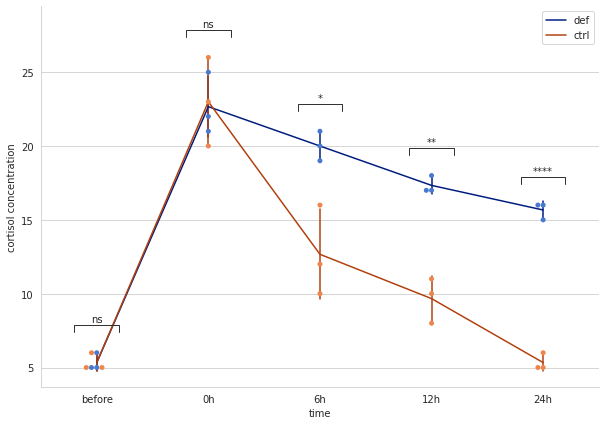

In [ ]:
# Size
fig, ax = plt.subplots(figsize=(10,7))

# Style
sns.set_style("whitegrid")
sns.despine()

# Plots
sns.lineplot(x=x, y=y, hue=hue, data=data, 
             err_style='bars', palette='dark',
             estimator=np.mean, ci='sd')

sns.swarmplot(x=x, y=y, hue=hue, data=data,
              dodge=False, palette='muted')

# Adjust the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2])

# p-values
ax, t_results = add_stat_annotation(ax, data=data, x=x, y=y, hue=hue,
                    box_pairs=pairs,
                    test='t-test_ind', text_format='star', loc='inside',
                    comparisons_correction=None, verbose=1,
                    linewidth=1)

# Save and show
plt.savefig('res.png', bbox_inches='tight')
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0h_def v.s. 0h_ctrl: t-test independent samples, P_val=8.820e-01 stat=-1.581e-01
before_def v.s. before_ctrl: t-test independent samples, P_val=1.000e+00 stat=0.000e+00
6h_def v.s. 6h_ctrl: t-test independent samples, P_val=1.680e-02 stat=3.951e+00
12h_def v.s. 12h_ctrl: t-test independent samples, P_val=1.244e-03 stat=8.132e+00
24h_def v.s. 24h_ctrl: t-test independent samples, P_val=2.563e-05 stat=2.192e+01


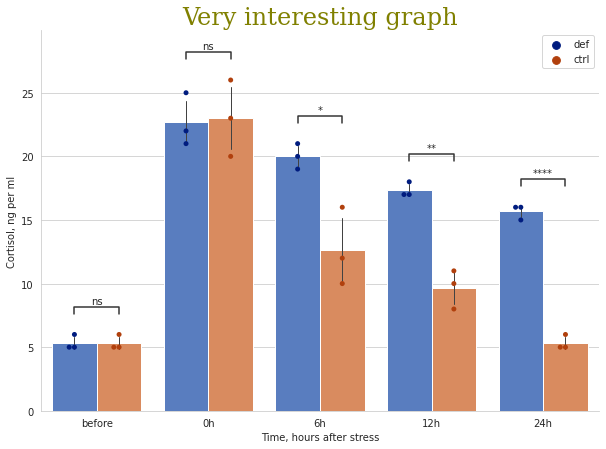

In [ ]:
# Size
fig, ax = plt.subplots(figsize=(10,7))

# Style
sns.set_style("whitegrid")
sns.despine()

# Plots
sns.barplot(x=x, y=y, hue=hue, data=data,
            dodge=True, palette='muted',
            ci='sd', errwidth=1)

sns.swarmplot(x=x, y=y, hue=hue, data=data,
              dodge=True, palette='dark')

# Adjust the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2])

# p-values
ax, t_results = add_stat_annotation(ax, data=data, x=x, y=y, hue=hue,
                    box_pairs=pairs,
                    test='t-test_ind', text_format='star', loc='inside',
                    comparisons_correction=None, verbose=1)

# Names
ax.set_xlabel('Time, hours after stress')
ax.set_ylabel('Cortisol, ng per ml')

font = {'family': 'serif',
        'color':  'olive',
        'weight': 'normal',
        'size': 24,
        }
ax.set_title('Very interesting graph', fontdict=font)


# Save and show
plt.savefig('res.png', bbox_inches='tight')
plt.show()

# Facetgrid (multiple graphs on one figure)

<Figure size 432x288 with 0 Axes>

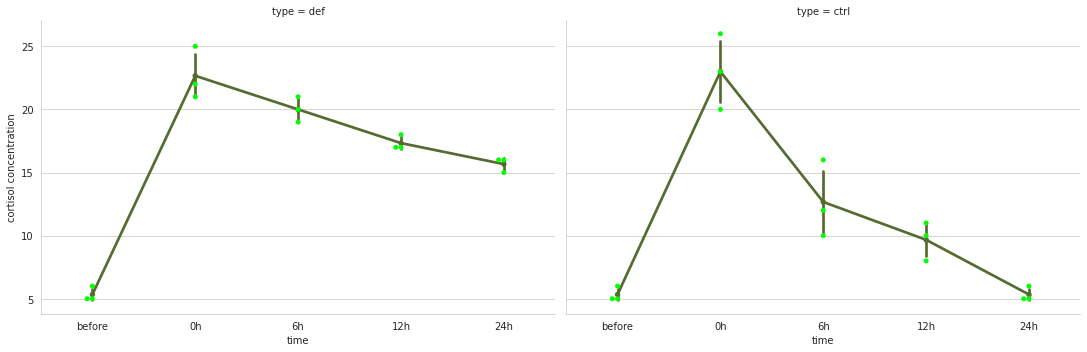

In [ ]:
# Style
sns.set_style("whitegrid")
sns.despine()

# Plot
g = sns.catplot(x=x, y=y, col='type', col_wrap=3, data=data, kind='point', ci='sd', sharey=True, 
                color='darkolivegreen', markers='.',
                height=5, aspect=1.5)

g.map_dataframe(sns.swarmplot, y=y, x=x, color='lime')

